# Introduction to dataset

In [1]:
import pandas as pd
from pandas.compat import StringIO
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv("imports-85.data",names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [2]:
print(cars.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [3]:
import numpy as np
cars.loc[cars["normalized-losses"]=="?","normalized-losses"]=np.nan

In [4]:
print(cars["normalized-losses"].head(5))

0    NaN
1    NaN
2    NaN
3    164
4    164
Name: normalized-losses, dtype: object


In [5]:
print(cars["normalized-losses"].isnull().sum())

41


In [6]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]


In [7]:
numeric_cars=numeric_cars.replace("?",np.nan)
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
numeric_cars=numeric_cars.dropna(subset=["price"])

In [9]:
numeric_cars.isnull().sum()


normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# Replace missing values in other columns using column means.

numeric_cars=numeric_cars.fillna(numeric_cars.mean())

In [11]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
# Normalize all columnns to range from 0 to 1 except the target column.
price=numeric_cars["price"]
numeric_cars=numeric_cars-numeric_cars.min()/numeric_cars.max()-numeric_cars.min()
numeric_cars["price"]=price

# Univariate model

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_set(features,predicts,numeric_cars):
    #Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(numeric_cars.index)
    rand_df = numeric_cars.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set = rand_df.iloc[0:last_train_row]
    test_set = rand_df.iloc[last_train_row:]
    knn=KNeighborsRegressor()
    knn.fit(train_set[[features]],train_set[predicts])
    predictions=knn.predict(test_set[[features]])
    mse=mean_squared_error(test_set[predicts],predictions)
    rsme=mse**(1/2)
    return rsme
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_set(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()    
#rsme=knn_train_set(["wheel-base"],"price",numeric_cars)


horsepower           4048.437725
curb-weight          4445.141920
highway-mpg          4643.046278
city-mpg             4759.289572
width                4772.459149
length               5428.810101
wheel-base           5460.851458
compression-rate     6610.812153
bore                 6795.388312
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

In [32]:
def knn_train_set(features,predicts,numeric_cars):
    #Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(numeric_cars.index)
    rand_df = numeric_cars.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set = rand_df.iloc[0:last_train_row]
    test_set = rand_df.iloc[last_train_row:]
    k=[1,3,5,7,9]
    k_mse={}
    for value in k:
        knn=KNeighborsRegressor(n_neighbors=value)
        knn.fit(train_set[[features]],train_set[predicts])
        predictions=knn.predict(test_set[[features]])
        mse=mean_squared_error(test_set[predicts],predictions)
        rsme=mse**(1/2)
        k_mse[value]=rsme
    return k_mse
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_set(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
print(rmse_results)    



{'normalized-losses': {1: 7836.7752643899685, 3: 7516.084828453897, 9: 7794.746366502435, 5: 7339.675755133537, 7: 7759.126829130677}, 'width': {1: 4559.257297950061, 3: 4737.58815424599, 9: 4730.373071846554, 5: 4772.459149439554, 7: 4715.918441236321}, 'peak-rpm': {1: 9511.480067750124, 3: 8537.550899973421, 9: 7372.170592767732, 5: 7649.170564081823, 7: 7549.741950042047}, 'height': {1: 8751.160007407449, 3: 8121.165102604576, 9: 7776.396862418894, 5: 8073.1197593196175, 7: 7693.302663098179}, 'highway-mpg': {1: 6025.594966720739, 3: 4671.390389789466, 9: 5227.337381566373, 5: 4643.046277675214, 7: 4792.485755925797}, 'compression-rate': {1: 8087.205346523092, 3: 7375.063685578359, 9: 7024.485525463435, 5: 6610.812153159129, 7: 6732.801282941515}, 'wheel-base': {1: 4493.734068810494, 3: 5208.39331165465, 9: 5738.405685192312, 5: 5460.851458362242, 7: 5448.1070513823315}, 'curb-weight': {1: 5264.290230758878, 3: 5022.318011757233, 9: 4632.92525121302, 5: 4445.141920375235, 7: 4330.60

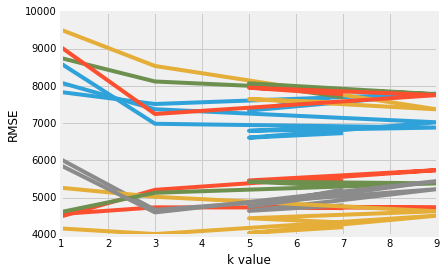

In [34]:

import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


In [37]:
feature_avg_rmse={}
for k,v in rmse_results.items():
    avg_rmse=np.mean(list(v.values()))
    feature_avg_rmse[k]=avg_rmse
features_rmse=pd.Series(feature_avg_rmse)
print(features_rmse.sort_values())
    

horsepower           4191.699237
width                4703.119223
curb-weight          4739.056704
highway-mpg          5071.970954
length               5173.087449
city-mpg             5177.521703
wheel-base           5269.898315
compression-rate     7166.073599
bore                 7232.319720
normalized-losses    7649.281809
stroke               7955.585214
height               8083.028879
peak-rpm             8124.022815
dtype: float64


Multivariate model

In [39]:
def knn_train_set(features,predicts,numeric_cars):
    #Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(numeric_cars.index)
    rand_df = numeric_cars.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set = rand_df.iloc[0:last_train_row]
    test_set = rand_df.iloc[last_train_row:]
    k=[5]
    k_mse={}
    for value in k:
        knn=KNeighborsRegressor(n_neighbors=value)
        knn.fit(train_set[features],train_set[predicts])
        predictions=knn.predict(test_set[features])
        mse=mean_squared_error(test_set[predicts],predictions)
        rsme=mse**(1/2)
        k_mse[value]=rsme
    return k_mse
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_set(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_set(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_set(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_set(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_set(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 4010.545922593048},
 'four best features': {5: 4010.4497757189724},
 'six best features': {5: 4005.179084808336},
 'three best features': {5: 4009.975326261712},
 'two best features': {5: 3800.4843868972157}}

# Multivariate model

In [44]:
def knn_train_set(features,predicts,numeric_cars):
    #Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(numeric_cars.index)
    rand_df = numeric_cars.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set = rand_df.iloc[0:last_train_row]
    test_set = rand_df.iloc[last_train_row:]
    k=[i for i in range(1,26)]
    k_mse={}
    for value in k:
        knn=KNeighborsRegressor(n_neighbors=value)
        knn.fit(train_set[features],train_set[predicts])
        predictions=knn.predict(test_set[features])
        mse=mean_squared_error(test_set[predicts],predictions)
        rsme=mse**(1/2)
        k_mse[value]=rsme
    return k_mse
k_rmse_results = {}
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_set(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_set(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_set(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 4509.369164021254,
  2: 4343.787075345728,
  3: 3977.908680003432,
  4: 4073.0060103559927,
  5: 4010.545922593048,
  6: 3987.8602144425763,
  7: 4093.0095425958834,
  8: 4238.820406831077,
  9: 4484.825609250113,
  10: 4481.4456288077845,
  11: 4645.992428140296,
  12: 4713.149464427942,
  13: 4846.147190169392,
  14: 4921.527752488946,
  15: 4961.846318840718,
  16: 4968.41938290733,
  17: 5026.37286915812,
  18: 5108.385955720972,
  19: 5127.20528283338,
  20: 5196.747817959358,
  21: 5195.586291147344,
  22: 5153.478102302993,
  23: 5211.86110505511,
  24: 5206.698186708858,
  25: 5245.878997136139},
 'four best features': {1: 4516.337252488771,
  2: 4319.991335192539,
  3: 3980.1625695828093,
  4: 4082.4237203589614,
  5: 4010.4497757189724,
  6: 3986.886120535525,
  7: 4093.056621668392,
  8: 4238.534846513756,
  9: 4484.702837182365,
  10: 4478.98496533567,
  11: 4645.8214443615125,
  12: 4712.928993467835,
  13: 4846.28781744001,
  14: 4929.1915945377

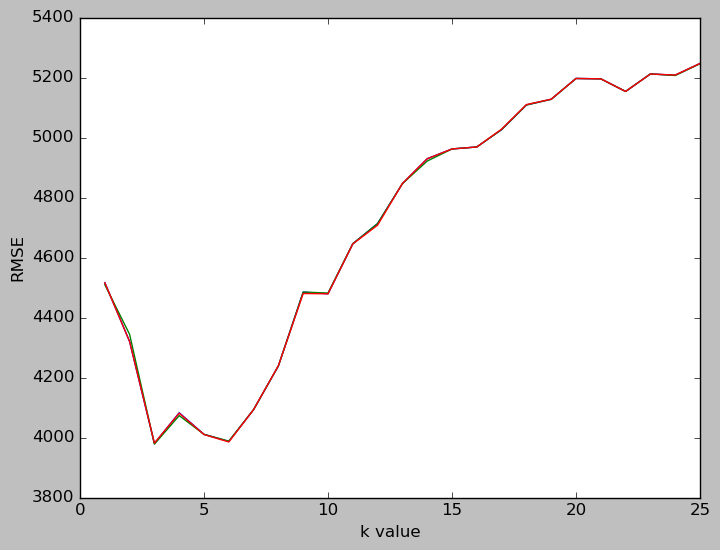

In [45]:
plt.style.use("default")
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
